In [3]:
from utils import *
import matplotlib.pyplot as plt

# DEGs

In [5]:
dat = pd.read_csv('../data/DEG/Blanco_Cellline.csv', index_col=0)
dat.head(3)

,SARS-CoV-1_L2FC,IAV_L2FC,MERS-CoV_L2FC,HPIV3_L2FC,RSV_L2FC,SARS-CoV-2(Calu-3)_L2FC,SARS-CoV-2(A549)_L2FC,SARS-CoV-2(A549-ACE2)LowMOI_L2FC,SARS-CoV-2(A549-ACE2)HiMOI_L2FC,SARS-CoV-2(A549-ACE2)-Ruxolitinib_L2FC,padj_SARS-CoV-1,padj_IAV,padj_MERS-CoV,padj_HPIV3,padj_RSV,padj_SARS-CoV-2(Calu-3),padj_SARS-CoV-2(A549),padj_SARS-CoV-2(A549-ACE2)LowMOI,padj_SARS-CoV-2(A549-ACE2)HiMOI,padj_SARS-CoV-2(A549-ACE2)-Ruxolitinib
GeneName,,,,,,,,,,,,,,,,,,,,
IFNL1,0.0,1.36970,0.00000,7.837988,7.142762,7.23990,0.0,0.0,5.077692,3.547628,1.0,1.0,1.0,2.620000e-68,4.510000e-44,2.530000e-139,1.0,0.0,1.000000e+00,1.0
IFNL2,0.0,1.37928,0.12531,6.843922,4.838329,7.87792,0.0,0.0,5.246026,1.947436,1.0,1.0,1.0,1.480000e-48,9.740000e-17,5.690000e-107,1.0,0.0,2.690000e-20,1.0
IFNL3,0.0,1.81542,0.00000,6.225043,4.827347,7.46801,0.0,0.0,5.045848,2.510746,1.0,1.0,1.0,3.660000e-35,3.190000e-16,5.510000e-102,1.0,0.0,2.370000e-18,1.0


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(23710, 2)
(8382, 2)


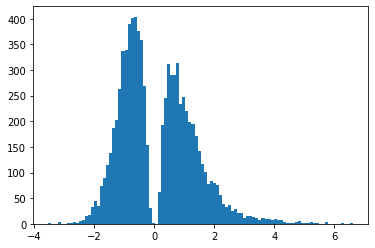

In [6]:
name = 'SARS-CoV-2(A549-ACE2)HiMOI'
sel = dat[[f'{name}_L2FC',f'padj_{name}']]
sel.rename( columns={f'{name}_L2FC':'L2FC', f'padj_{name}':'padj'}, inplace=True )
print(sel.shape)

sel = sel[sel['padj']<0.05]
print(sel.shape)

_ = plt.hist(sel['L2FC'].values, bins=100)

In [7]:
from gprofiler import GProfiler
from utils import *

genes = sel[sel['L2FC']>2].index.tolist()

547 genes
(595, 14)
Plotting selected enrichment for 547 Upregulated genes
20 terms with height figsize Bbox(x0=0.0, y0=0.0, x1=4.0, y1=8.0) box Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


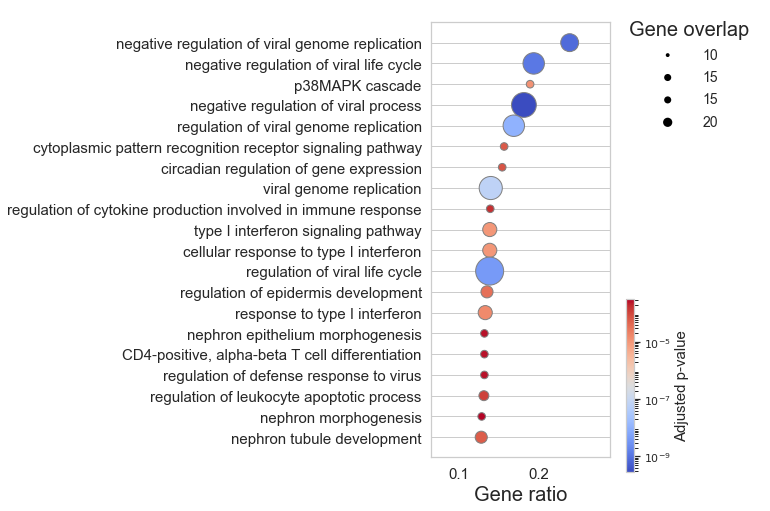

In [5]:
genes = sel[sel['L2FC']>2].index.tolist()
print(f'{len(genes)} genes')

gp = GProfiler(return_dataframe=True)
enr = gp.profile(organism='hsapiens',query=genes,significance_threshold_method='fdr')

# enr_sel = enr[(enr['source'].isin(['GO:BP','GO:MF'])) & (enr['term_size']<=300) & (enr['intersection_size']>=10)].reset_index(drop=True).sort_values('recall', ascending=False)
enr_sel = enr[(enr['source'].isin(['GO:BP','GO:MF'])) & (enr['intersection_size']>=10)].reset_index(drop=True).sort_values('recall', ascending=False)
print(enr_sel.shape)

print(f'Plotting selected enrichment for {len(genes)} Upregulated genes')
plot_enrich(enr_sel, title='', save=f'../figures/A549.filtered_GO.up.png', 
            fontsize=50, dpi=300)

In [6]:
terms_tmp = [x for x in enr['name'] if 'chemokine' in x]
enr[enr['name'].isin(terms_tmp)]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
484,GO:BP,GO:1990869,cellular response to chemokine,0.000374,True,"""Any process that results in a change in state...",97,424,11,17916,0.025943,0.113402,query_1,"[GO:0071345, GO:1990868]"
485,GO:BP,GO:1990868,response to chemokine,0.000374,True,"""Any process that results in a change in state...",97,424,11,17916,0.025943,0.113402,query_1,[GO:0034097]
669,GO:MF,GO:0008009,chemokine activity,0.003510,True,"""The function of a family of small chemotactic...",49,434,7,18134,0.016129,0.142857,query_1,"[GO:0005125, GO:0042379]"
724,GO:BP,GO:0045073,regulation of chemokine biosynthetic process,0.004613,True,"""Any process that modulates the frequency, rat...",15,424,4,17916,0.009434,0.266667,query_1,"[GO:0032642, GO:0042033, GO:0042035]"
734,REAC,REAC:R-HSA-380108,Chemokine receptors bind chemokines,0.005026,True,Chemokine receptors bind chemokines,57,265,8,10588,0.030189,0.140351,query_1,[REAC:R-HSA-375276]
760,GO:BP,GO:0050755,chemokine metabolic process,0.005732,True,"""The chemical reactions and pathways involving...",16,424,4,17916,0.009434,0.250000,query_1,[GO:0042107]
761,GO:BP,GO:0042033,chemokine biosynthetic process,0.005732,True,"""The chemical reactions and pathways resulting...",16,424,4,17916,0.009434,0.250000,query_1,"[GO:0032602, GO:0042089, GO:0050755]"
900,GO:MF,GO:0045236,CXCR chemokine receptor binding,0.011020,True,"""Interacting selectively and non-covalently wi...",18,434,4,18134,0.009217,0.222222,query_1,[GO:0042379]
948,GO:BP,GO:0070098,chemokine-mediated signaling pathway,0.012334,True,"""A series of molecular signals initiated by th...",88,424,8,17916,0.018868,0.090909,query_1,"[GO:0019221, GO:1990869]"
1111,GO:MF,GO:0042379,chemokine receptor binding,0.018943,True,"""Interacting selectively and non-covalently wi...",70,434,7,18134,0.016129,0.100000,query_1,"[GO:0001664, GO:0005126]"


In [7]:
terms_tmp = [x for x in enr_sel['name'] if 'cytokine' in x]
enr_sel[enr_sel['name'].isin(terms_tmp)]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
273,GO:BP,GO:0002718,regulation of cytokine production involved in ...,1.689313e-04,True,"""Any process that modulates the frequency, rat...",72,424,10,17916,0.023585,0.138889,query_1,"[GO:0001817, GO:0002367, GO:0002700, GO:0050776]"
344,GO:BP,GO:0002367,cytokine production involved in immune response,1.112710e-03,True,"""The appearance of a cytokine due to biosynthe...",92,424,10,17916,0.023585,0.108696,query_1,"[GO:0001816, GO:0002440, GO:0006955]"
258,GO:BP,GO:0042089,cytokine biosynthetic process,1.242311e-04,True,"""The chemical reactions and pathways resulting...",157,424,15,17916,0.035377,0.095541,query_1,"[GO:0001816, GO:0009059, GO:0042107]"
264,GO:BP,GO:0042107,cytokine metabolic process,1.312570e-04,True,"""The chemical reactions and pathways involving...",158,424,15,17916,0.035377,0.094937,query_1,[GO:0019538]
287,GO:BP,GO:0042035,regulation of cytokine biosynthetic process,2.570020e-04,True,"""Any process that modulates the frequency, rat...",148,424,14,17916,0.033019,0.094595,query_1,"[GO:0001817, GO:0010556, GO:0031326, GO:004208..."
205,GO:MF,GO:0005125,cytokine activity,1.171884e-05,True,"""The activity of a soluble extracellular gene ...",219,434,20,18134,0.046083,0.091324,query_1,[GO:0048018]
151,GO:BP,GO:0001818,negative regulation of cytokine production,8.920453e-08,True,"""Any process that stops, prevents, or reduces ...",356,424,30,17916,0.070755,0.084270,query_1,"[GO:0001816, GO:0001817, GO:0010629, GO:0051241]"
357,GO:BP,GO:0071706,tumor necrosis factor superfamily cytokine pro...,1.426753e-03,True,"""The appearance of any member of the TNF super...",177,424,14,17916,0.033019,0.079096,query_1,[GO:0001816]
343,GO:BP,GO:0060759,regulation of response to cytokine stimulus,1.086666e-03,True,"""Any process that modulates the rate, frequenc...",194,424,15,17916,0.035377,0.077320,query_1,"[GO:0034097, GO:0048583]"
401,GO:BP,GO:1903555,regulation of tumor necrosis factor superfamil...,2.884112e-03,True,"""Any process that modulates the frequency, rat...",169,424,13,17916,0.030660,0.076923,query_1,"[GO:0001817, GO:0071706]"


# Gset

In [8]:
gset = read_gmt('../data/geneset/c5.all.v6.2.symbols.gmt')
'go_response_to_cytokine' in gset

s1 = pd.read_csv('../data/geneset/IFN1_GO_0060337.txt', sep='\t',header=None).iloc[:,0].values
s2 = gset['go_response_to_cytokine']
print(f'{len(s1)} IFN I genes, {len(s2)} cytokine genes')

down = list(set([g for g in genes if g in s2])) # up regulated cytokine genes after infection
up  = list(set([g for g in s1 if g not in down])) # IFN I which were not stimulated
print(f'{len(up)} up genes, {len(down)} down genes')

130 IFN I genes, 714 cytokine genes
87 up genes, 59 down genes


In [38]:
genes = sel[sel['L2FC']>2].index.tolist()
print('#------ IFN I')
with open('../data/cmap/input_up.txt','w') as f:
    for g in up:
        f.write(f'{g}\n')
print(f'Written {len(up)} up genes')

print('#------ go_response_to_cytokine')
with open('../data/cmap/input_down.txt','w') as f:
    for g in down:
        f.write(f'{g}\n')
print(f'Written {len(down)} down genes')

#------ IFN I
Written 113 up genes
#------ go_response_to_cytokine
Written 59 down genes
